# Tidy Tuesday - Rolling Stone Album Rankings

This is an exploration of the tidytuesday data set for 05/07/2024, found at https://github.com/rfordatascience/tidytuesday/tree/master/data/2024/2024-05-07.

The suggested question is: What are the characteristics of artists and genres popular at different times?

In [14]:
# Import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

In [17]:
# Import data
rolling_stone = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-05-07/rolling_stone.csv')

In [3]:
#explore data
rolling_stone.head()

,sort_name,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,...,peak_billboard_position,spotify_popularity,spotify_url,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,album_id
0,"Sinatra, Frank",Frank Sinatra,In the Wee Small Hours,100.0,101.0,282.0,-182,1955,Big Band/Jazz,Studio,...,2,48.0,spotify:album:3GmwKB1tgPZgXeRJZSm9WX,1.0,Male,1915.0,1946.0,40.0,9.0,3GmwKB1tgPZgXeRJZSm9WX
1,"Diddley, Bo",Bo Diddley,Bo Diddley / Go Bo Diddley,214.0,216.0,455.0,-241,1955,Rock n' Roll/Rhythm & Blues,Studio,...,201,50.0,spotify:album:1cbtDEwxCjMhglb49OgNBR,1.0,Male,1928.0,1955.0,27.0,0.0,1cbtDEwxCjMhglb49OgNBR
2,"Presley, Elvis",Elvis Presley,Elvis Presley,55.0,56.0,332.0,-277,1956,Rock n' Roll/Rhythm & Blues,Studio,...,1,58.0,spotify:album:7GXP5OhYyPVLmcVfO9Iqin,1.0,Male,1935.0,1956.0,21.0,0.0,7GXP5OhYyPVLmcVfO9Iqin
3,"Sinatra, Frank",Frank Sinatra,Songs for Swingin' Lovers!,306.0,308.0,NaN,-195,1956,Big Band/Jazz,Studio,...,2,62.0,spotify:album:4kca7vXd1Wo5GE2DMafvMc,1.0,Male,1915.0,1946.0,41.0,10.0,4kca7vXd1Wo5GE2DMafvMc
4,Little Richard,Little Richard,Here's Little Richard,50.0,50.0,227.0,-177,1957,NaN,Studio,...,13,64.0,spotify:album:18tV6PLXYvVjsdOVk0S7M8,1.0,Male,1932.0,1957.0,25.0,0.0,18tV6PLXYvVjsdOVk0S7M8


In [4]:
rolling_stone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sort_name                 691 non-null    object 
 1   clean_name                691 non-null    object 
 2   album                     691 non-null    object 
 3   rank_2003                 500 non-null    float64
 4   rank_2012                 500 non-null    float64
 5   rank_2020                 500 non-null    float64
 6   differential              691 non-null    int64  
 7   release_year              691 non-null    int64  
 8   genre                     527 non-null    object 
 9   type                      691 non-null    object 
 10  weeks_on_billboard        572 non-null    float64
 11  peak_billboard_position   691 non-null    int64  
 12  spotify_popularity        654 non-null    float64
 13  spotify_url               655 non-null    object 
 14  artist_mem

Observations:

There are null values in the rank, but none in the differential. *This is because the list is 500 each year, and different artists are on the lists in different years.*

The `differential` = `rank_2003` - `rank_2020`. If the rank for that year is empty, 501 is substituted in. So for example, Frank Sinatra at index 3 is 306 - 501 = -195.

Before I realized there was an actual question, I looked at a pair plot to see if any interesting trends popped up. 


In [15]:
# Replace inf values with NaN to get rid of warnings in pairplot, didn't work
# rolling_stone.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\motor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\motor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\motor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\motor\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

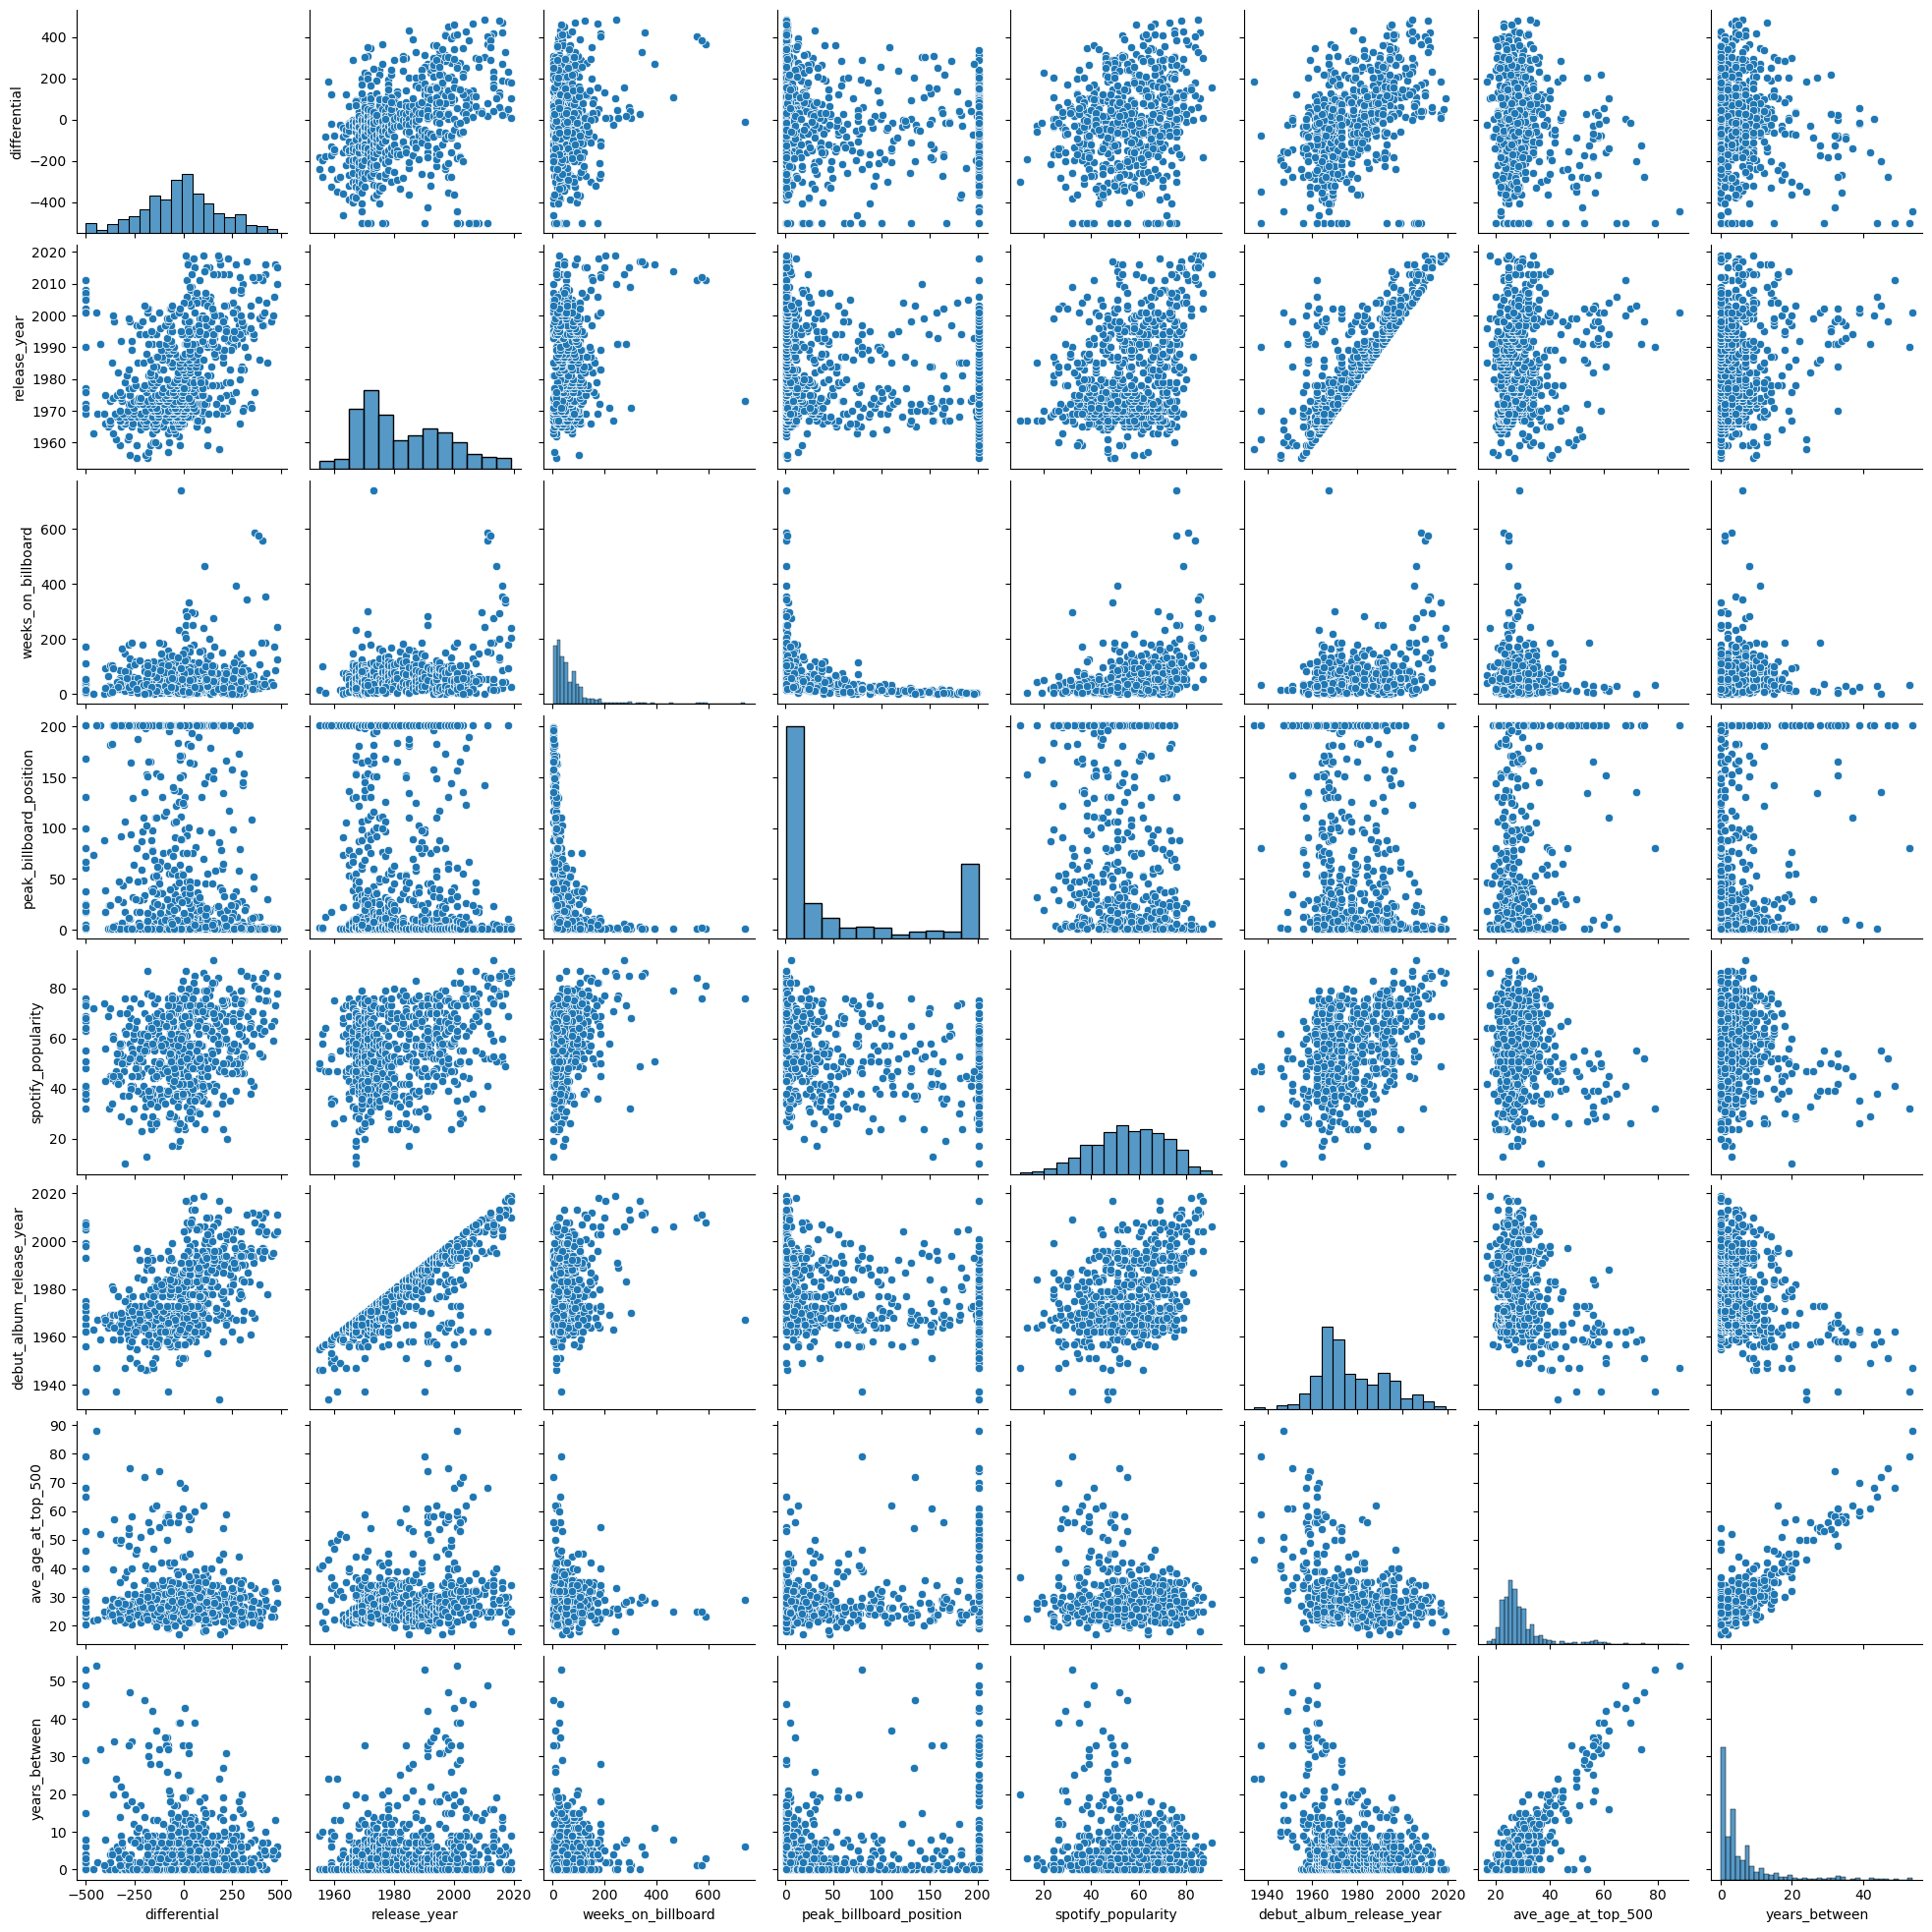

In [18]:
sns.pairplot(rolling_stone, vars=['differential','release_year', 'weeks_on_billboard', 'peak_billboard_position',
                                  'spotify_popularity', 'debut_album_release_year', 'ave_age_at_top_500', 'years_between'])

plt.show()

Everything looks as expected (except I can't get rid of the FutureWarnings), except the release year includes more albums from the late 60s through the 70s. The differential is pretty evenly distributed, the weeks on Billboard are low, the Billboard position favors the \#1 spot (but there is a spike just before 200), the popularity on Spotify is evenly distributed, the average age is centered around 30, and there are more artists with fewer years between the artist's debut album and top 500 ranking album. 

I'm interested in seeing what relationships the genre, the year the album was released, and the differential (the change in ranking) have.  And why not throw in gender, too. 

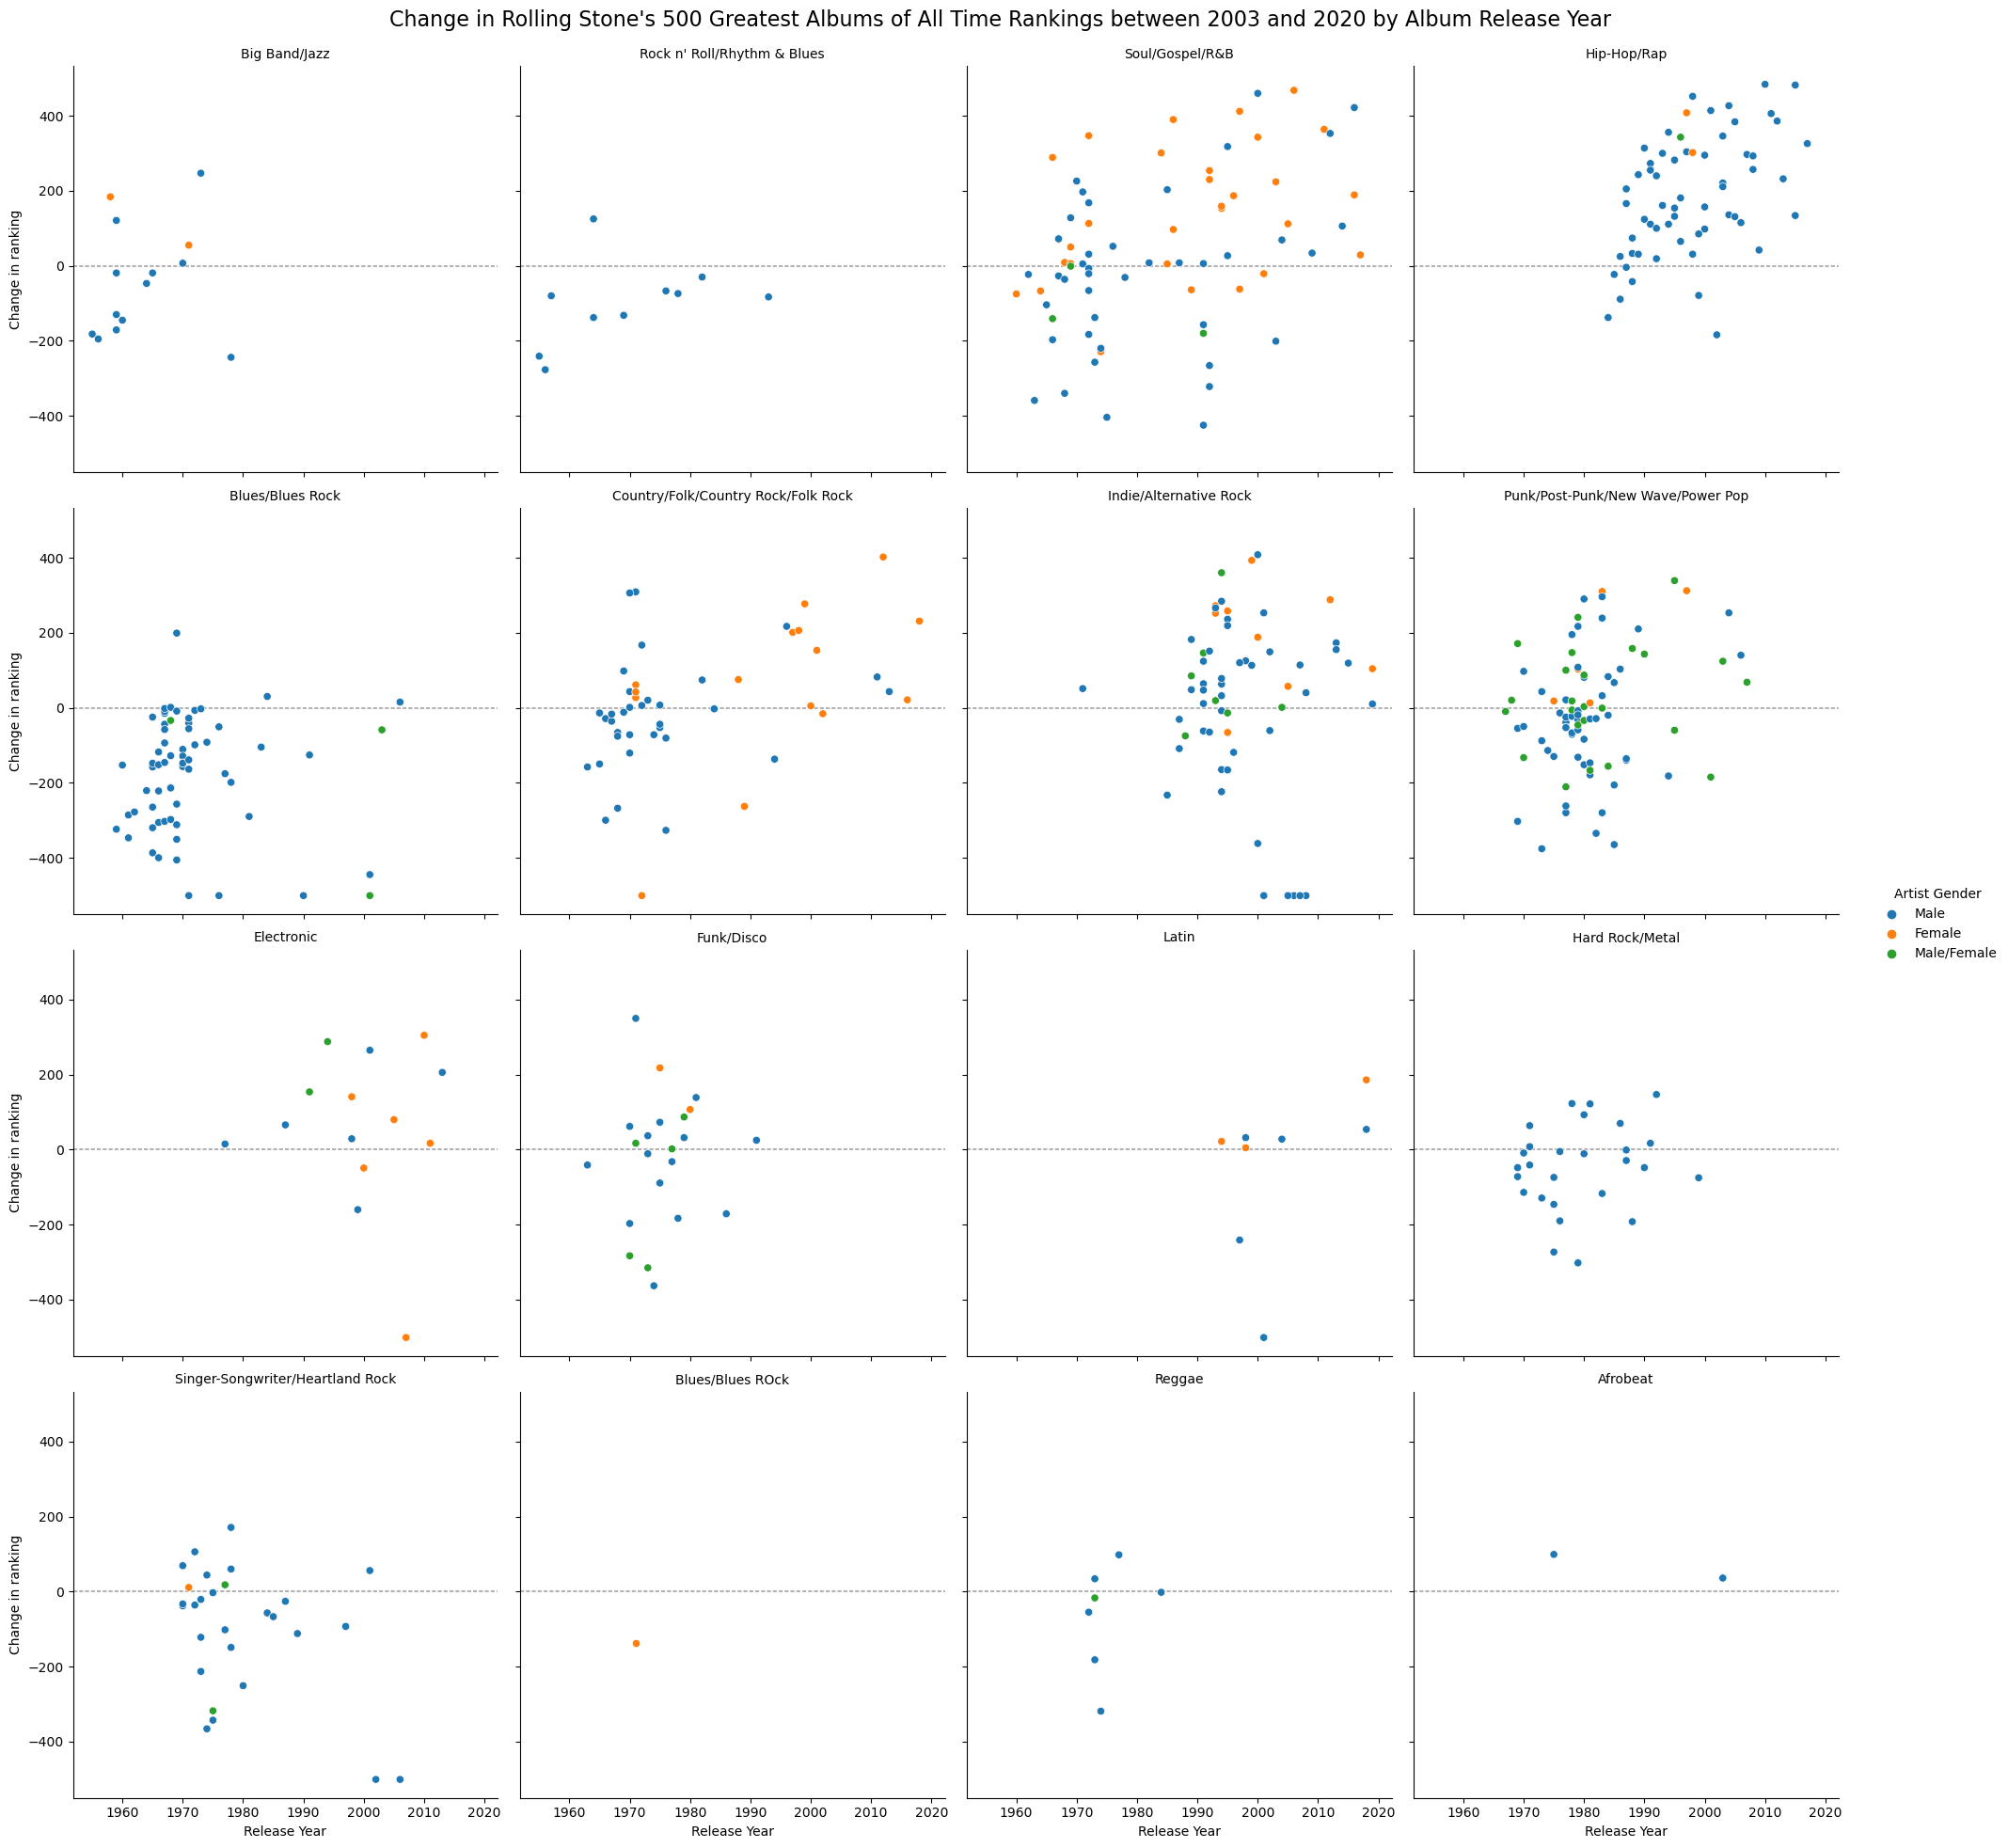

In [27]:
yr_plot = sns.relplot(
    data=rolling_stone, x='release_year', y='differential',
    col="genre", hue="artist_gender", palette="tab10", kind="scatter", col_wrap=4
)

(yr_plot.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Release Year", "Change in ranking")
  .set_titles("{col_name}")
  .tight_layout()
)

yr_plot.fig.suptitle('Change in Rolling Stone\'s 500 Greatest Albums of All Time Rankings between 2003 and 2020 by Album Release Year', fontsize=16)
plt.subplots_adjust(top=0.95)

yr_plot._legend.set_title('Artist Gender')

plt.savefig('Rolling_Stone.png')

plt.show()

It seems that female artists tend to increase in the rankings, or more female artists are having their albums considered, at least in the Soul/Gospel/R&B category.

In [31]:
rolling_stone.loc[(rolling_stone['genre'] == 'Soul/Gospel/R&B') & (rolling_stone['artist_gender'] == 'Female')]

,sort_name,clean_name,album,rank_2003,rank_2012,rank_2020,differential,release_year,genre,type,...,peak_billboard_position,spotify_popularity,spotify_url,artist_member_count,artist_gender,artist_birth_year_sum,debut_album_release_year,ave_age_at_top_500,years_between,album_id
6,"Winehouse, Amy",Amy Winehouse,Back to Black,NaN,451.0,33.0,468,2006,Soul/Gospel/R&B,Studio,...,2,67.0,spotify:album:097eYvf9NKjFnv4xA9s2oV,1.0,Female,1983.0,2003.0,23.000000,3.0,097eYvf9NKjFnv4xA9s2oV
13,"Badu, Erykah",Erykah Badu,Baduizm,NaN,NaN,89.0,412,1997,Soul/Gospel/R&B,Studio,...,2,67.0,spotify:album:3qr4pTBWEU1SVf01j6RAx3,1.0,Female,1971.0,1997.0,26.000000,0.0,3qr4pTBWEU1SVf01j6RAx3
19,"Jackson, Janet",Janet Jackson,Control,NaN,NaN,111.0,390,1986,Soul/Gospel/R&B,Studio,...,1,54.0,spotify:album:7GWkceE5McMVfffd1RGL6Y,1.0,Female,1966.0,1982.0,20.000000,4.0,7GWkceE5McMVfffd1RGL6Y
20,Etta James,Etta James,At Last!,116.0,119.0,191.0,-75,1960,Soul/Gospel/R&B,Studio,...,201,75.0,spotify:album:7rd4PorIOPjPTy7qdUeeCt,1.0,Female,1938.0,1960.0,22.000000,0.0,7rd4PorIOPjPTy7qdUeeCt
22,Adele,Adele,21,NaN,NaN,137.0,364,2011,Soul/Gospel/R&B,Studio,...,1,81.0,spotify:album:0Lg1uZvI312TPqxNWShFXL,1.0,Female,1988.0,2008.0,23.000000,3.0,0Lg1uZvI312TPqxNWShFXL
25,"Franklin, Aretha",Aretha Franklin,Amazing Grace,NaN,NaN,154.0,347,1972,Soul/Gospel/R&B,Live,...,7,38.0,spotify:album:5pIUimaQ6XePPXbMUi3te0,1.0,Female,1942.0,1961.0,30.000000,11.0,5pIUimaQ6XePPXbMUi3te0
26,"Badu, Erykah",Erykah Badu,Mama's Gun,NaN,NaN,158.0,343,2000,Soul/Gospel/R&B,Studio,...,11,66.0,spotify:album:3cADvHRdKniF9ELCn1zbGH,1.0,Female,1971.0,1997.0,29.000000,3.0,3cADvHRdKniF9ELCn1zbGH
31,Sade,Sade,Diamond Life,NaN,NaN,200.0,301,1984,Soul/Gospel/R&B,Studio,...,5,64.0,spotify:album:3JcNnjMVSKiNpqhErZarW0,1.0,Female,1959.0,1984.0,25.000000,0.0,3JcNnjMVSKiNpqhErZarW0
33,"Simone, Nina",Nina Simone,Wild is the Wind,NaN,NaN,212.0,289,1966,Soul/Gospel/R&B,Studio,...,9,49.0,spotify:album:2EYVXfypcucR62WMKJl6Mr,1.0,Female,1933.0,1959.0,33.000000,7.0,2EYVXfypcucR62WMKJl6Mr
41,Sade,Sade,Love Deluxe,NaN,NaN,247.0,254,1992,Soul/Gospel/R&B,Studio,...,3,70.0,spotify:album:2PfGKHtqEX58bHtkQxJnWG,1.0,Female,1959.0,1984.0,33.000000,8.0,2PfGKHtqEX58bHtkQxJnWG


Also, if anyone has suggestions for easier-to-differentiate colors for the plots, please let me know!